In [1]:
from laonlp import word_tokenize
import pandas as pd
import re

In [2]:
filename = pd.read_csv('Data\QnA.csv', header=None)

q = filename.iloc[:, 0].values
a = filename.iloc[:, 1].values

# Create Vocabulary

In [3]:
word2count = []

for question in q:
    question = word_tokenize(question)
    for tokens in question:
        word2count.append(tokens)

for answer in a:
    answer = word_tokenize(answer)
    for tokens in answer:
        word2count.append(tokens)          

In [4]:
from collections import Counter

word2count = sorted(Counter(word2count))

In [5]:
vocab = {}

word_num = 1
for word in word2count:
    vocab[word] = word_num
    word_num += 1

In [6]:
tokens = ['<PAD>', '<EOS>', '<OUT>', '<SOS>']
x = len(vocab)
for token in tokens:
    x += 1
    vocab[token] = x

In [7]:
vocab['<PAD>'] = 0

In [8]:
inv_vocab = {w:v for v, w in vocab.items()}
inv_vocab

{1: ' ',
 2: '#',
 3: '(',
 4: ')',
 5: '),',
 6: '+',
 7: ',',
 8: '-',
 9: '.',
 10: '/',
 11: '0',
 12: '020',
 13: '021',
 14: '1',
 15: '1,220,000',
 16: '1,255,000',
 17: '1,290,000',
 18: '1,360,000',
 19: '1,570,000',
 20: '1,605,000',
 21: '1,640,000',
 22: '1,675,000',
 23: '1,710,000',
 24: '10',
 25: '100',
 26: '11.45',
 27: '11:30',
 28: '13.00',
 29: '137',
 30: '13:00',
 31: '14',
 32: '143',
 33: '144',
 34: '15',
 35: '15,950,000',
 36: '16.45',
 37: '16:30',
 38: '17',
 39: '173',
 40: '18',
 41: '19',
 42: '2',
 43: '2,860,000',
 44: '2.00',
 45: '2.50',
 46: '20',
 47: '2004',
 48: '2005',
 49: '21',
 50: '210,000',
 51: '22245128',
 52: '23232378',
 53: '25,300,000',
 54: '26',
 55: '27',
 56: '28',
 57: '29',
 58: '3',
 59: '3.0',
 60: '3.00',
 61: '30',
 62: '30,000',
 63: '310,000',
 64: '35,000',
 65: '36',
 66: '37',
 67: '38',
 68: '39',
 69: '4',
 70: '40',
 71: '46',
 72: '49',
 73: '5',
 74: '50',
 75: '54',
 76: '55',
 77: '550,000',
 78: '55682978',
 79

In [9]:
import pickle

pickle.dump(inv_vocab, open("vocabulary.pkl", "wb"))

In [10]:
pickle.load(open("vocabulary.pkl", "rb"))

{1: ' ',
 2: '#',
 3: '(',
 4: ')',
 5: '),',
 6: '+',
 7: ',',
 8: '-',
 9: '.',
 10: '/',
 11: '0',
 12: '020',
 13: '021',
 14: '1',
 15: '1,220,000',
 16: '1,255,000',
 17: '1,290,000',
 18: '1,360,000',
 19: '1,570,000',
 20: '1,605,000',
 21: '1,640,000',
 22: '1,675,000',
 23: '1,710,000',
 24: '10',
 25: '100',
 26: '11.45',
 27: '11:30',
 28: '13.00',
 29: '137',
 30: '13:00',
 31: '14',
 32: '143',
 33: '144',
 34: '15',
 35: '15,950,000',
 36: '16.45',
 37: '16:30',
 38: '17',
 39: '173',
 40: '18',
 41: '19',
 42: '2',
 43: '2,860,000',
 44: '2.00',
 45: '2.50',
 46: '20',
 47: '2004',
 48: '2005',
 49: '21',
 50: '210,000',
 51: '22245128',
 52: '23232378',
 53: '25,300,000',
 54: '26',
 55: '27',
 56: '28',
 57: '29',
 58: '3',
 59: '3.0',
 60: '3.00',
 61: '30',
 62: '30,000',
 63: '310,000',
 64: '35,000',
 65: '36',
 66: '37',
 67: '38',
 68: '39',
 69: '4',
 70: '40',
 71: '46',
 72: '49',
 73: '5',
 74: '50',
 75: '54',
 76: '55',
 77: '550,000',
 78: '55682978',
 79

# Clean Question

In [11]:
def remove_special_character(text):
    return re.sub(r'[^0-9a-zA-Zກຂຄງຈສຊຍດຕຖທນບປຜຝພຟມຢລຫຼຣວຫອຮໜໝໆຽະາ ິ ີ ຶ ື ໂ ໍເແ ຸ ູຳໄໃ ັ ົ ່ ້ ໌+]', '', text)

def remove_spaces(text):
    
    return text.replace(" ", "")

In [12]:
stop_words = ['ໃຜ','ເປັນ','ຂຶ້ນ','ໃນ','ໃດ','ແດ່','ການ','ຄົນ','ຂອງ','ແມ່ນ','ຫຍັງ','ຂໍ','ກັບ','ແນວໃດ','ໄດ້','ເກຣດ','ມີ',
              'ໂທ','ບໍ','ຜູ້','ແລ້ວ','ແນ່','ມາ','ຖ້າ','ຢາກ','ສາຍ','ໂຕ','ເບິ່ງ','ຈະ','ເຂົ້າ','ຕ້ອງ','ສາມາດ','ຫຼັງຈາກ','ຕິດຕໍ່',
              'ອີກ','ຍັງ','ຕໍ່', 'ອາທິດ','ເທົ່າໃດ','ເສຍ','ກ່ຽວກັບ','ໃຊ້', 'ເວລາ','ຕາມ','ສືບຕໍ່','ໄປ','ລະດັບ','ຈາກ','ເຮັດ']

In [15]:
clean_q = [remove_spaces(i) for i in q]
clean_q = [remove_special_character(i) for i in clean_q]

In [16]:
clean_q = [word_tokenize(i) for i in clean_q]
clean_q

[['ສະບາຍດີ'],
 ['ຂໍໂທດ'],
 ['ຂອບໃຈ'],
 ['ໃຜ', 'ເປັນ', 'ຫົວໜ້າ', 'ພາກ', 'ວິຊາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ'],
 ['ໃຜ', 'ເປັນ', 'ຮອງ', 'ຫົວໜ້າ', 'ພາກ', 'ວິຊາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ'],
 ['ພາກ', 'ວິຊາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ', 'ສ້າງ', 'ຂຶ້ນ', 'ໃນ', 'ປີ', 'ໃດ'],
 ['ພາກ', 'ວິຊາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ', 'ມີ', 'ຈັກ', 'ສາຂາ'],
 ['ພາກ', 'ວິຊາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ', 'ມີ', 'ສາຂາ', 'ຫຍັງ', 'ແດ່'],
 ['ພາກ', 'ວິຊາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ', 'ມີ', 'ຈັກ', 'ຫຼັກສູດ'],
 ['ພາກ', 'ວິຊາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ', 'ມີ', 'ຫຼັກສູດ', 'ໃດ', 'ແດ່'],
 ['ມີ', 'ຫຼັກສູດ', 'ປະລິນຍາເອກ', 'ບໍ'],
 ['ມີ', 'ຫຼັກສູດ', 'ປະລິນຍາໂທ', 'ບໍ'],
 ['ມີ', 'ຫຼັກສູດ', 'ຊັ້ນສູງ', 'ບໍ'],
 ['ມີ', 'ຫຼັກສູດ', 'ຕໍ່ເນື່ອງ', 'ປະລິນຍາຕີ', 'ບໍ'],
 ['ຫຼັກສູດ', 'ປະລິນຍາໂທ', 'ມີ', 'ຈັກ', 'ສາຂາ'],
 ['ຫຼັກສູດ', 'ປະລິນຍາຕີ', 'ມີ', 'ຈັກ', 'ສາຂາ'],
 ['ຫຼັກສູດ', 'ປະລິນຍາເອກ', 'ມີ', 'ຈັກ', 'ສາຂາ'],
 ['ຫຼັກສູດ', 'ຕໍ່ເນື່ອງ', 'ປະລິນຍາຕີ', 'ມີ', 'ຈັກ', 'ສາຂາ'],
 ['ຫຼັກສູດ', 'ຕໍ່ເນື່ອງ', 'ມີ', 'ຈັກ', 'ສາຂາ'],
 ['ສາຂາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ', 'ມີ

# Create Keyword list

In [17]:
dataX = []
dataY = []

In [18]:
for tokens in clean_q:
    token = [i for i in tokens if i not in stop_words]

    dataX.append(token)    

In [19]:
dataX

[['ສະບາຍດີ'],
 ['ຂໍໂທດ'],
 ['ຂອບໃຈ'],
 ['ຫົວໜ້າ', 'ພາກ', 'ວິຊາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ'],
 ['ຮອງ', 'ຫົວໜ້າ', 'ພາກ', 'ວິຊາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ'],
 ['ພາກ', 'ວິຊາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ', 'ສ້າງ', 'ປີ'],
 ['ພາກ', 'ວິຊາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ', 'ຈັກ', 'ສາຂາ'],
 ['ພາກ', 'ວິຊາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ', 'ສາຂາ'],
 ['ພາກ', 'ວິຊາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ', 'ຈັກ', 'ຫຼັກສູດ'],
 ['ພາກ', 'ວິຊາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ', 'ຫຼັກສູດ'],
 ['ຫຼັກສູດ', 'ປະລິນຍາເອກ'],
 ['ຫຼັກສູດ', 'ປະລິນຍາໂທ'],
 ['ຫຼັກສູດ', 'ຊັ້ນສູງ'],
 ['ຫຼັກສູດ', 'ຕໍ່ເນື່ອງ', 'ປະລິນຍາຕີ'],
 ['ຫຼັກສູດ', 'ປະລິນຍາໂທ', 'ຈັກ', 'ສາຂາ'],
 ['ຫຼັກສູດ', 'ປະລິນຍາຕີ', 'ຈັກ', 'ສາຂາ'],
 ['ຫຼັກສູດ', 'ປະລິນຍາເອກ', 'ຈັກ', 'ສາຂາ'],
 ['ຫຼັກສູດ', 'ຕໍ່ເນື່ອງ', 'ປະລິນຍາຕີ', 'ຈັກ', 'ສາຂາ'],
 ['ຫຼັກສູດ', 'ຕໍ່ເນື່ອງ', 'ຈັກ', 'ສາຂາ'],
 ['ສາຂາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ', 'ຈັກ', 'ຫຼັກສູດ'],
 ['ສາຂາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ', 'ຫຼັກສູດ'],
 ['ສາຂາ', 'ພັດທະນາ', 'ໂປຣແກຣມ', 'ຄອມພິວເຕີ', 'ຈັກ', 'ຫຼັກສູດ'],
 ['ສາຂາ', 'ພັດທະນາ', 'ໂປຣແກຣມ', 'ຄອມພິວເຕີ', 'ຫຼັກ

In [20]:
keyword = []
for sentence in dataX:
    for token in sentence:
        keyword.append(token)

In [21]:
from collections import Counter

keyword_list = sorted(Counter(keyword))
print(keyword_list)

['1', '2', '3', '4', 'A', 'AI', 'B', 'B+', 'C', 'C+', 'D', 'D+', 'F', 'ກຳນົດ', 'ຂອບໃຈ', 'ຂໍໂທດ', 'ຄວາມຮູ້', 'ຄອມພິວເຕີ', 'ຄະແນນ', 'ຄັດເລືອກ', 'ຄ່າ', 'ຈັກ', 'ຈົບ', 'ຈົບຊັ້ນສູງ', 'ຈ່າຍ', 'ຊອບແວ', 'ຊັ້ນສູງ', 'ຊາດ', 'ຊື່', 'ຊ່ອງທາງ', 'ຕໍ່ເນື່ອງ', 'ທັດສະນະ', 'ທຳນຽມ', 'ທີ່', 'ທຶນ', 'ທົ່ວໄປ', 'ນັກພັດທະນາ', 'ນັກສຶກສາ', 'ນາໆ', 'ບັງຄັບ', 'ບໍ່', 'ປະກາສະນີຍະບັດ', 'ປະລິນຍາຕີ', 'ປະລິນຍາເອກ', 'ປະລິນຍາໂທ', 'ປີ', 'ຜ່ານ', 'ພະນັກງານ', 'ພັດທະນາ', 'ພາກ', 'ພາກຮຽນ', 'ພາຍຫຼັງ', 'ພາສາ', 'ພື້ນຖານ', 'ຟີ', 'ມື້', 'ຢູ່', 'ລາວ', 'ວັນເສົາ', 'ວິຊາ', 'ວິທະຍາສາດ', 'ວິທະຍາສາສາດ', 'ສອບເສັງ', 'ສະບາຍດີ', 'ສະເພາະ', 'ສາຂາ', 'ສຳພາດ', 'ສຶກສາ', 'ສ້າງ', 'ຫາ', 'ຫຸ່ນຍົນ', 'ຫົວໜ້າ', 'ຫຼັກສູດ', 'ອັງກິດ', 'ອີເມວ', 'ອື່ນ', 'ຮອງ', 'ຮັບຜິດຊອບ', 'ຮຽນ', 'ເກມ', 'ເງື່ອນໄຂ', 'ເບີ', 'ເພີ່ມ', 'ເລກ', 'ເລືອກ', 'ເວັບໄຊ', 'ເສັງ', 'ເຮັດວຽກ', 'ແບ່ງ', 'ແຮັກເກີ', 'ໂປຣແກຣມ', 'ໂມງ', 'ໄວ້', 'ໜ່ວຍກິດ', 'ໜ່ວຍງານ', 'ໝວດ']


In [22]:
import pickle

pickle.dump(keyword_list, open("keyword.pkl", "wb"))

# Clean Answer

In [23]:
for i in range(len(a)):
    a[i] = '<SOS>' + a[i] + '<EOS>'

In [24]:
a

array(['<SOS>ສະບາຍດີ ມີຫຍັງໃຫ້ຊ່ວຍບໍ<EOS>', '<SOS>ບໍ່ເປັນຫຍັງ<EOS>',
       '<SOS>ໂດຍ ຍິນດີທີ່ໄດ້ຊ່ວຍເຫຼືອ<EOS>',
       '<SOS>ຫົວໜ້າພາກວິຊາວິທະຍາສາດຄອມພິວເຕີແມ່ນ ອຈ.ປອ. ລັດສະໝີ ຈິດຕະວົງ<EOS>',
       '<SOS>ຮອງຫົວໜ້າພາກວິຊາວິທະຍາສາດຄອມພິວເຕີແມ່ນ ຊອ.ປທ. ອໍລະດີ ຄຳມະນີວົງ ແລະ ອຈ.ປທ. ອາມອນ ຈັນທະພາວົງ<EOS>',
       '<SOS>ພາກວິຊາວິທະຍາສາດຄອມພິວເຕີສ້າງຂຶ້ນໃນສົກປີ 2004-2005<EOS>',
       '<SOS>ພາກວິຊາວິທະຍາສາດຄອມພິວເຕີມີທັງໝົດ 3 ສາຂາຄື: ສາຂາວິທະຍາສາດຄອມພິວເຕີ, ສາຂາການພັດທະນາເວັບໄຊ ແລະ ສາຂາການພັດທະນາໂປຣແກຣມຄອມພິວເຕີ<EOS>',
       '<SOS>ພາກວິຊາວິທະຍາສາດຄອມພິວເຕີປະກອບມີ 3 ສາຂາຄື: ສາຂາວິທະຍາສາດຄອມພິວເຕີ, ສາຂາການພັດທະນາເວັບໄຊ ແລະ ສາຂາການພັດທະນາໂປຣແກຣມຄອມພິວເຕີ<EOS>',
       '<SOS>ພາກວິຊາວິທະຍາສາດຄອມພິວເຕີປະກອບມີ 3 ຫຼັກສູດຄື: ຫຼັກສູດຕໍ່ເນື່ອງປະລິນຍາຕີ, ຫຼັກສູດປະລິນຍາຕີ ແລະ ຫຼັກສູດປະລິນຍາໂທ<EOS>',
       '<SOS>ພາກວິຊາວິທະຍາສາດຄອມພິວເຕີປະກອບມີ 3 ຫຼັກສູດດັ່ງນີ້: ຫຼັກສູດຕໍ່ເນື່ອງປະລິນຍາຕີ, ຫຼັກສູດປະລິນຍາຕີ ແລະ ຫຼັກສູດປະລິນຍາໂທ<EOS>',
       '<SOS>ໃນປັດຈຸບັນຍັງບໍ່ທັນມີຫຼັກສູດປະລິນຍາເອກເທື່ອ<EOS>',
      

In [25]:
dataY = [word_tokenize(i) for i in a]
dataY

[['<SOS>', 'ສະບາຍດີ', ' ', 'ມີ', 'ຫຍັງ', 'ໃຫ້', 'ຊ່ວຍ', 'ບໍ', '<EOS>'],
 ['<SOS>', 'ບໍ່', 'ເປັນຫຍັງ', '<EOS>'],
 ['<SOS>', 'ໂດຍ', ' ', 'ຍິນດີ', 'ທີ່', 'ໄດ້', 'ຊ່ວຍເຫຼືອ', '<EOS>'],
 ['<SOS>',
  'ຫົວໜ້າ',
  'ພາກ',
  'ວິຊາ',
  'ວິທະຍາສາດ',
  'ຄອມພິວເຕີ',
  'ແມ່ນ',
  ' ',
  'ອຈ.',
  'ປອ.',
  ' ',
  'ລັດສະໝີ',
  ' ',
  'ຈິດຕະວົງ',
  '<EOS>'],
 ['<SOS>',
  'ຮອງ',
  'ຫົວໜ້າ',
  'ພາກ',
  'ວິຊາ',
  'ວິທະຍາສາດ',
  'ຄອມພິວເຕີ',
  'ແມ່ນ',
  ' ',
  'ຊອ.',
  'ປທ.',
  ' ',
  'ອໍລະດີ',
  ' ',
  'ຄຳມະນີວົງ',
  ' ',
  'ແລະ',
  ' ',
  'ອຈ.',
  'ປທ.',
  ' ',
  'ອາມອນ',
  ' ',
  'ຈັນທະພາວົງ',
  '<EOS>'],
 ['<SOS>',
  'ພາກ',
  'ວິຊາ',
  'ວິທະຍາສາດ',
  'ຄອມພິວເຕີ',
  'ສ້າງ',
  'ຂຶ້ນ',
  'ໃນ',
  'ສົກປີ',
  ' ',
  '2004',
  '-',
  '2005',
  '<EOS>'],
 ['<SOS>',
  'ພາກ',
  'ວິຊາ',
  'ວິທະຍາສາດ',
  'ຄອມພິວເຕີ',
  'ມີ',
  'ທັງໝົດ',
  ' ',
  '3',
  ' ',
  'ສາຂາ',
  'ຄື',
  ':',
  ' ',
  'ສາຂາ',
  'ວິທະຍາສາດ',
  'ຄອມພິວເຕີ',
  ',',
  ' ',
  'ສາຂາ',
  'ການ',
  'ພັດທະນາ',
  'ເວັບໄຊ',
  ' ',
  'ແລະ',
  ' ',
  'ສາຂາ',

# Encoder Input

In [26]:
enc_in = []
for i in dataX:
    lst = []
    for word in i:
        if word not in vocab:
            lst.append(vocab['<SOS>'])
        else:
            lst.append(vocab[word])
    enc_in.append(lst)  

In [27]:
print(enc_in)

[[517], [252], [243], [552, 441, 493, 496, 259], [577, 552, 441, 493, 496, 259], [441, 493, 496, 259, 542, 433], [441, 493, 496, 259, 283, 523], [441, 493, 496, 259, 523], [441, 493, 496, 259, 283, 554], [441, 493, 496, 259, 554], [554, 421], [554, 422], [554, 302], [554, 347, 420], [554, 422, 283, 523], [554, 420, 283, 523], [554, 421, 283, 523], [554, 347, 420, 283, 523], [554, 347, 283, 523], [523, 496, 259, 283, 554], [523, 496, 259, 554], [523, 440, 672, 259, 283, 554], [523, 440, 672, 259, 554], [523, 440, 627, 283, 554], [523, 440, 627, 554], [580, 441, 493, 496, 259], [304, 554, 445, 481, 554, 420, 523, 496, 259], [304, 554, 445, 565, 554, 420, 523, 496, 259], [304, 554, 445, 481, 523, 496, 259], [304, 554, 445, 565, 523, 496, 259], [308, 580, 441, 493, 496, 259], [571, 580, 441, 493, 496, 259], [611, 580, 441, 493, 496, 259], [308, 580, 523, 496, 259], [571, 580, 523, 496, 259], [611, 580, 523, 496, 259], [308, 580, 523, 440, 627], [571, 580, 523, 440, 627], [611, 580, 523, 44

# Decoder Input

In [28]:
dec_in = []
for i in dataY:
    lst = []
    for word in i:
        if word not in vocab:
            lst.append(vocab['<OUT>'])
        else:
            lst.append(vocab[word])
    dec_in.append(lst) 

In [29]:
from keras.preprocessing.sequence import pad_sequences

enc_in = pad_sequences(enc_in, 15, padding='post', truncating='post')
dec_in = pad_sequences(dec_in, 100, padding='post', truncating='post')

In [30]:
enc_in

array([[517,   0,   0, ...,   0,   0,   0],
       [252,   0,   0, ...,   0,   0,   0],
       [243,   0,   0, ...,   0,   0,   0],
       ...,
       [304, 413, 445, ...,   0,   0,   0],
       [304, 413, 445, ...,   0,   0,   0],
       [304, 413, 445, ...,   0,   0,   0]])

# Decoder Output

In [31]:
import numpy as np

dec_out = np.zeros_like(dec_in)
dec_out[:, :-1] = dec_in[:, 1:]

In [32]:
dec_out

array([[517,   1, 461, ...,   0,   0,   0],
       [406, 613, 694, ...,   0,   0,   0],
       [666,   1, 312, ...,   0,   0,   0],
       ...,
       [304, 602, 655, ...,   0,   0,   0],
       [304, 602, 655, ...,   0,   0,   0],
       [304, 602, 655, ...,   0,   0,   0]])

# Model

In [33]:
from keras.models import Model
from keras.layers import Dense, Embedding, LSTM, TimeDistributed, Input

enc_inp = Input(shape=(15, ))
dec_inp = Input(shape=(100, ))

In [34]:
VOCAB_SIZE = len(vocab) + 1

In [35]:
enc_embed = Embedding(VOCAB_SIZE, 128)(enc_inp)
enc_lstm = LSTM(256, return_state=True)
enc_op, h, c = enc_lstm(enc_embed)
enc_states = [h, c]

In [36]:
dec_embed = Embedding(VOCAB_SIZE, 128)(dec_inp)
dec_lstm = LSTM(256, return_sequences=True, return_state=True)
dec_op, _, _ = dec_lstm(dec_embed, initial_state=enc_states)
dense = TimeDistributed(Dense(VOCAB_SIZE, activation='softmax'))
dec_op = dense(dec_op)

In [37]:
model = Model([enc_inp, dec_inp], dec_op)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 15)]                 0         []                            


                                                                                                  
 input_2 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 15, 128)              89216     ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 100, 128)             89216     ['input_2[0][0]']             
                                                                                                  
 lstm (LSTM)                 [(None, 256),                394240    ['embedding[0][0]']           
                              (None, 256),                                                        
                              (None, 256)]                                                        
          

In [38]:
history = model.fit([enc_in, dec_in], np.expand_dims(dec_out, -1), epochs=200)

Epoch 1/200
22/22 [==============================] - 10s 256ms/step - loss: 3.7637 - accuracy: 0.5974
Epoch 2/200
22/22 [==============================] - 4s 200ms/step - loss: 2.2853 - accuracy: 0.6249
Epoch 3/200
22/22 [==============================] - 4s 197ms/step - loss: 2.0338 - accuracy: 0.6518
Epoch 4/200
22/22 [==============================] - 4s 196ms/step - loss: 1.8437 - accuracy: 0.6702
Epoch 5/200
22/22 [==============================] - 4s 202ms/step - loss: 1.9328 - accuracy: 0.6667
Epoch 6/200
22/22 [==============================] - 4s 199ms/step - loss: 1.6016 - accuracy: 0.7112
Epoch 7/200
22/22 [==============================] - 4s 198ms/step - loss: 1.5543 - accuracy: 0.7131
Epoch 8/200
22/22 [==============================] - 4s 199ms/step - loss: 1.5154 - accuracy: 0.7147
Epoch 9/200
22/22 [==============================] - 4s 200ms/step - loss: 1.4723 - accuracy: 0.7157
Epoch 10/200
22/22 [==============================] - 4s 200ms/step - loss: 1.4442 - accur

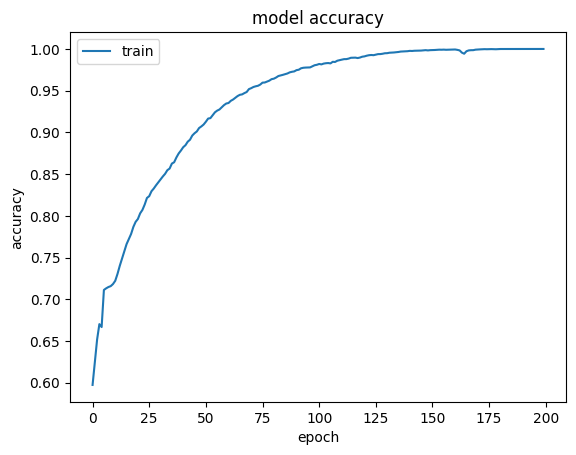

In [39]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

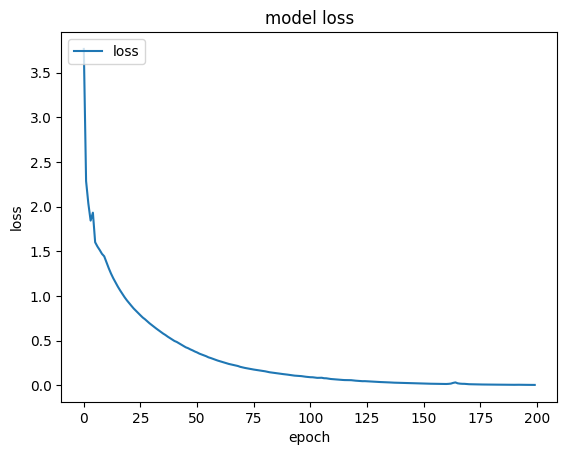

In [40]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

# Inference Model

In [41]:
from keras.models import Model
from keras.layers import Input

In [42]:
enc_model = Model(enc_inp, enc_states)

In [43]:
decoder_state_input_h = Input(shape=(256,))
decoder_state_input_c = Input(shape=(256,))

decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_lstm_outputs, state_h, state_c = dec_lstm(dec_embed, initial_state=decoder_states_inputs)

decoder_states = [state_h, state_c]
decoder_outputs = dense(decoder_lstm_outputs)
dec_model = Model([dec_inp] + decoder_states_inputs, [decoder_outputs] + decoder_states)

In [46]:
enc_model.save('encoder_model')
dec_model.save('decoder_model')

INFO:tensorflow:Assets written to: encoder_model\assets


INFO:tensorflow:Assets written to: encoder_model\assets


INFO:tensorflow:Assets written to: decoder_model\assets


INFO:tensorflow:Assets written to: decoder_model\assets


In [1]:
from keras.models import load_model
enc_model = load_model('encoder_model')
dec_model = load_model('decoder_model')

In [44]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.

    states_value = enc_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    target_seq[0,0] = vocab['<SOS>']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = dec_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = inv_vocab[sampled_token_index]
        decoded_sentence += '' + sampled_word

        # Exit condition: either hit max length or find stop token.
        if (sampled_word == '<EOS>' or len(word_tokenize(decoded_sentence)) > 100):
            stop_condition = True

        # Update the target sequence (length 1).
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence

In [45]:
while True:
    input_text = input("You: ")
    if input_text == 'exit':
        break
    input_seq = remove_special_character(input_text)
    input_seq = remove_spaces(input_seq)
    txt = []
    lst = []
    input_seq = word_tokenize(input_seq)
    words = []
    for word in input_seq:
        if word in keyword_list:
            words.append(word)
    #words = [w for w in input_seq if w in keyword_list]
    for x in words:
        try:
            lst.append(vocab[x])
        except:
            lst.append(vocab['<OUT>'])
    
    txt.append(lst)
    
    input_padded_seq = pad_sequences(txt, 15, padding='post', truncating='post')
    response = decode_sequence(input_padded_seq)
    print(f"You: {input_text} / {input_padded_seq}")
    print(f"Bot: {response}")

1/1 [==============================] - 0s 25ms/step
You: ພາກວິຊາວິທະຍາສາດຄອມພິວເຕີມີຈັກສາຂາ / [[441 493 496 259 283 523   0   0   0   0   0   0   0   0   0]]
Bot: ພາກວິຊາວິທະຍາສາດຄອມພິວເຕີມີທັງໝົດ 3 ສາຂາຄື: ສາຂາວິທະຍາສາດຄອມພິວເຕີ, ສາຂາການພັດທະນາເວັບໄຊ ແລະ ສາຂາການພັດທະນາໂປຣແກຣມຄອມພິວເຕີ<EOS>
1/1 [==============================] - 0s 26ms/step
You: ພາກວິຊາວິທະຍາສາດຄອມພິວເຕີມີຫຼັກສູດໃດແດ່ / [[441 493 496 259 554   0   0   0   0   0   0   0   0   0   0]]
Bot: ພາກວິຊາວິທະຍາສາດຄອມພິວເຕີປະກອບມີ 3 ຫຼັກສູດດັ່ງນີ້: ຫຼັກສູດຕໍ່ເນື່ອງປະລິນຍາຕີ, ຫຼັກສູດປະລິນຍາຕີ ແລະ ຫຼັກສູດປະລິນຍາໂທ<EOS>
1/1 [==============================] - 0s 28ms/step
You: ເກຣດ A ຕ້ອງມີຄະແນນເທົ່າໃດ / [[107 262   0   0   0   0   0   0   0   0   0   0   0   0   0]]
Bot: ເກຣດ A ຕ້ອງມີຄະແນນຕັ້ງແຕ່ 91 ຄະແນນຂຶ້ນໄປ<EOS>
1/1 [==============================] - 0s 26ms/step
You: ຄ່າຮຽນສາຂາວິທະຍາສາດຄອມພິວເຕີ / [[279 586 523 496 259   0   0   0   0   0   0   0   0   0   0]]
Bot: ຄ່າຮຽນຂອງແຕ່ລະສາຂາແມ່ນຈະໄລ່ຕາມໜ່ວຍກິດຂອງວິຊາຮຽນໃນແຕ່ລະປີ ແລະ ຄ